# Importing Tensorflow and mnist dataset

In [31]:
import tensorflow as tf
import keras_preprocessing
from keras.models import Sequential
from keras.layers import LSTM,CuDNNLSTM,Dropout,Dense
mnist = tf.keras.datasets.mnist

In [41]:
(X_oldtrain,Y_train), (X_oldtest,Y_test) = mnist.load_data()

# Data Pre-processing

In [42]:
X_oldtrain = (X_oldtrain/255)
X_oldtest = (X_oldtest/255)

In [3]:
X_train = X_oldtrain.reshape(60000,28,28,1)

In [4]:
X_test = X_oldtest.reshape(10000,28,28,1)

In [34]:
X_oldtrain.shape

(60000, 28, 28)

In [43]:
X_oldtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

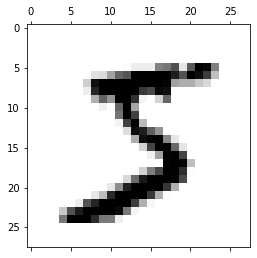

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.matshow(X_train[0], cmap = plt.cm.binary)

In [36]:
#normalizing the data - 0 to 1
X_train = tf.keras.utils.normalize(X_oldtrain, axis=1)
X_test = tf.keras.utils.normalize(X_oldtest, axis=1)

# Model Building

In [18]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model1.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [45]:
model3 = Sequential()
model3.add(LSTM(128,input_shape=(X_train.shape[1:]),return_sequences=True,activation=tf.nn.relu))
model3.add(tf.keras.layers.Dropout(0.20))
model3.add(LSTM(128,activation=tf.nn.relu))
model3.add(tf.keras.layers.Dropout(0.20))
model3.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model3.add(tf.keras.layers.Dropout(0.20))
model3.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model3.compile(optimizer ='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Model Training

In [32]:
model2.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0818 - accuracy: 0.9748
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0682 - accuracy: 0.9794
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0416 - accuracy: 0.9878


In [19]:
model1.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5250 - accuracy: 0.8472
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1274 - accuracy: 0.9611
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0860 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0630 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9832


In [46]:
model3.fit(X_oldtrain,Y_train,epochs=5)

# Data Augmentation

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 10,width_shift_range = 0.1 ,height_shift_range = 0.1,zoom_range = 0.1)
iterator = datagen.flow(X_train,Y_train,batch_size=1875)
model1.fit(iterator,steps_per_epoch=5)

5/5 [==============================] - 3s 578ms/step - loss: 1.2593 - accuracy: 0.7267


# Model Evaluation

In [14]:
#sigmoid
val_loss, val_acc = model2.evaluate(X_test, Y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 893us/step - loss: 0.1021 - accuracy: 0.9672
0.1021103709936142
0.967199981212616


In [20]:
#wihout ImageDataGenerator - relu
val_loss, val_acc = model1.evaluate(X_test, Y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 909us/step - loss: 0.0868 - accuracy: 0.9758
0.08676233142614365
0.9757999777793884


In [22]:
#with ImageDataGenerator - relu
val_loss, val_acc = model1.evaluate(X_test, Y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 890us/step - loss: 0.0857 - accuracy: 0.9761
0.0856969952583313
0.9761000275611877


In [23]:
#conversion of activation function values to class labels
X_test_flattened = X_test.reshape(len(X_test),28*28)
Y_Predicted = model1.predict(X_test)
Y_pred_classes = np.argmax(Y_Predicted, axis=1)
Y_pred_classes[3]

0

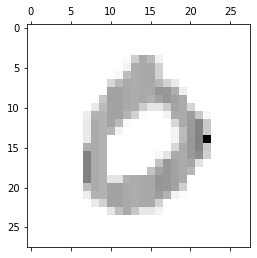

In [24]:
import matplotlib.pyplot as plt
plt.matshow(X_test[3], cmap=plt.cm.binary)

# Confusion Matrix

In [31]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(Y_test, Y_pred_classes))
print('Classification Report:\n', classification_report(Y_test, Y_pred_classes))

Accuracy: 0.9761
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.96      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.96      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



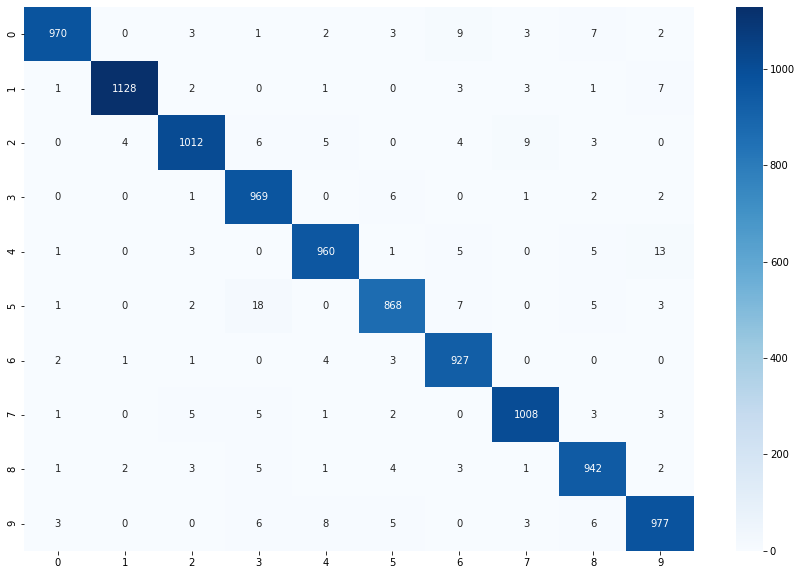

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(Y_pred_classes,Y_test)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(matrix, annot=True, fmt='d', ax=ax, cmap="Blues")